In [0]:
!echo '{"username":"<name>","key":"<key>"}' > /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d bidluo/phobiav1
!unzip /content/phobiav1.zip -d data_dir
!rm /content/phobiav1.zip

In [0]:
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 128

IMG_HEIGHT = 150
IMG_WIDTH = 150

data_dir = "/content/data_dir/data_dir"

train_image_generator = ImageDataGenerator(                                                                                                
    rescale=1./255,                                                                                                                        
    rotation_range=45,                                                                                                                     
    width_shift_range=.15,                                                                                                                 
    height_shift_range=.15,                                                                                                                
    horizontal_flip=True,                                                                                                                  
    zoom_range=0.5,
    validation_split=0.2                                                                                                               
)                                                               

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=data_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                           subset="training")


val_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=data_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                            subset="validation")


Using TensorFlow backend.


Found 34150 images belonging to 3 classes.
Found 8537 images belonging to 3 classes.


In [0]:
from tensorflow.keras.models import Sequential                                                                                         
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D 
from tensorflow.keras.optimizers import RMSprop

EPOCHS = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

model = Sequential([                                                                                                                   
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),                                          
    MaxPooling2D(),                                                                                                                    
    Dropout(0.2),                                                                                                                      
    Conv2D(32, 3, padding='same', activation='relu'),                                                                                  
    MaxPooling2D(),                                                                                                                    
    Conv2D(64, 3, padding='same', activation='relu'),                                                                                  
    MaxPooling2D(),                                                                                                                    
    Dropout(0.2),                                                                                                                      
    Flatten(),                                                                                                                         
    Dense(512, activation='relu'),                                                                                                     
    Dense(1, activation='sigmoid')                                                                                                     
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['sparse_categorical_accuracy'])

history = model.fit_generator(train_data_gen,
                              steps_per_epoch = train_data_gen.samples // BATCH_SIZE,
                              epochs = EPOCHS,
                              validation_data = val_data_gen,
                              validation_steps = val_data_gen.samples // BATCH_SIZE)

Epoch 1/15
106/266 [==========>...................] - ETA: 3:49 - loss: nan - sparse_categorical_accuracy: 0.2927

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
model.save_weights('/content/drive/My Drive/untitled folder/model_weights.h5')
model.save('/content/drive/My Drive/untitled folder/model_keras.h5')

{'loss': [0.8801753606425413, 0.7086434561132257, 0.6539656723115356, 0.6123604902962684, 0.5888374098261496, 0.5506321792182312, 0.5405957221207001, 0.5254654333246819, 0.5016283064486734, 0.5010084972538006, 0.48843814032389354, 0.4810453856543576, 0.46511428425617724, 0.45442543722819234, 0.44692745682325785], 'sparse_categorical_accuracy': [0.56310624, 0.66621596, 0.700047, 0.72353184, 0.735961, 0.7589128, 0.7644172, 0.76809126, 0.7823761, 0.7820822, 0.7893716, 0.7909, 0.80162835, 0.80339193, 0.80730116], 'val_loss': [0.774605575836066, 0.7237157433321981, 0.6356006138252489, 0.6147793666882948, 0.5617757398973812, 0.5763098593011047, 0.5683472431970366, 0.5836431122187412, 0.497483719478954, 0.5032203071045153, 0.48382478500857495, 0.48350492029479053, 0.48459547667792346, 0.46390135179866443, 0.4469432636643901], 'val_sparse_categorical_accuracy': [0.6317472, 0.65755206, 0.70951706, 0.72170925, 0.7501184, 0.745857, 0.75343275, 0.7464489, 0.78977275, 0.7882339, 0.79498106, 0.78870

Text(0.5, 1.0, 'Training and Validation Loss')

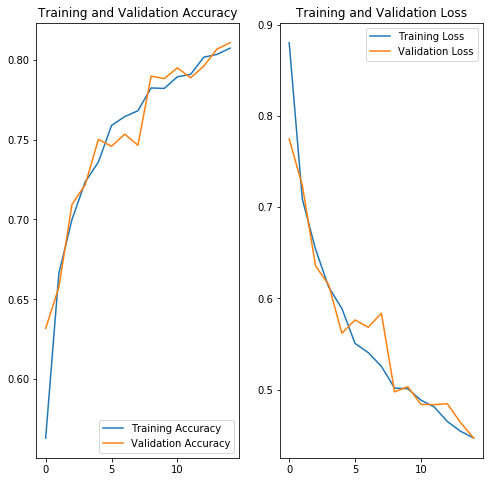

In [0]:
import matplotlib.pyplot as plt

print(history.history)
acc = history.history['sparse_categorical_accuracy']                                                                                                          
val_acc = history.history['val_sparse_categorical_accuracy']                                                                                                  
                                                                                                                                           
loss = history.history['loss']                                                                                                             
val_loss = history.history['val_loss']                                                                                                     
                                                                                                                                           
epochs_range = range(EPOCHS)                                                                                                               
                                                                                                                                           
plt.figure(figsize=(8, 8))                                                                                                                 
plt.subplot(1, 2, 1)                                                                                                                       
plt.plot(epochs_range, acc, label='Training Accuracy')                                                                                     
plt.plot(epochs_range, val_acc, label='Validation Accuracy')                                                                               
plt.legend(loc='lower right')                                                                                                              
plt.title('Training and Validation Accuracy')                                                                                              
                                                                                                                                           
plt.subplot(1, 2, 2)                                                                                                                       
plt.plot(epochs_range, loss, label='Training Loss')                                                                                        
plt.plot(epochs_range, val_loss, label='Validation Loss')                                                                                  
plt.legend(loc='upper right')                                                                                                              
plt.title('Training and Validation Loss')  